<a href="https://colab.research.google.com/github/iishutov/CV-Project/blob/master/ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.preprocessing.image import ImageDataGenerator
from google.colab import drive

import matplotlib.pyplot as plt

In [3]:
train_dir = '/content/drive/MyDrive/dataset/train'
test_dir = '/content/drive/MyDrive/dataset/test'

batch_size = 32
rescale = 1./255
img_height = img_width = 128

Found 574 images belonging to 2 classes.


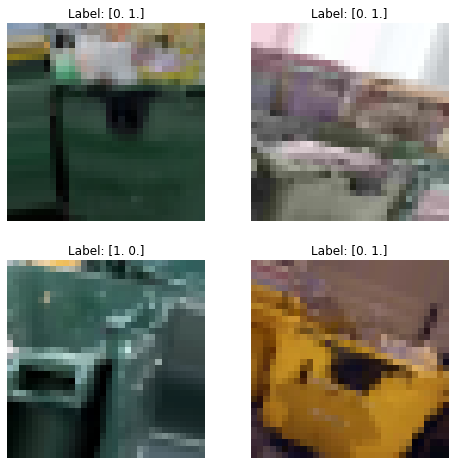

In [41]:
# Training dataset preprocessing
train_datagen = ImageDataGenerator(
    rescale=rescale,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.0
)

train_dataset = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(32, 32),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=42,
)

# Show the resulted training dataset after augmentation.
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8,8))
for i in range(2):
    for j in range(2):
        image, label = train_dataset.next()
        axs[i,j].imshow(image[0])
        axs[i,j].set_title(f'Label: {label[0]}')
        axs[i,j].axis('off')
plt.show()

In [6]:
# ImageDataGenerator does not increase the size of the dataset.
train_dataset.n

574

In [24]:
# Building the convolutional base.
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
# Adding Dense Layers.
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(2))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 32)          9248      
                                                                 
 flatten_3 (Flatten)         (None, 512)              

In [25]:
# Training the model.
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy']
    )

history = model.fit(train_dataset, epochs = 5)

Epoch 1/5
18/18 [==============================] - 3s 116ms/step - loss: 0.6830 - accuracy: 0.5523
Epoch 2/5
18/18 [==============================] - 2s 134ms/step - loss: 0.6585 - accuracy: 0.5836
Epoch 3/5
18/18 [==============================] - 2s 108ms/step - loss: 0.6539 - accuracy: 0.6481
Epoch 4/5
18/18 [==============================] - 2s 114ms/step - loss: 0.6069 - accuracy: 0.6603
Epoch 5/5
18/18 [==============================] - 2s 109ms/step - loss: 0.5707 - accuracy: 0.6812


Found 101 images belonging to 2 classes.
4/4 [==============================] - 0s 59ms/step


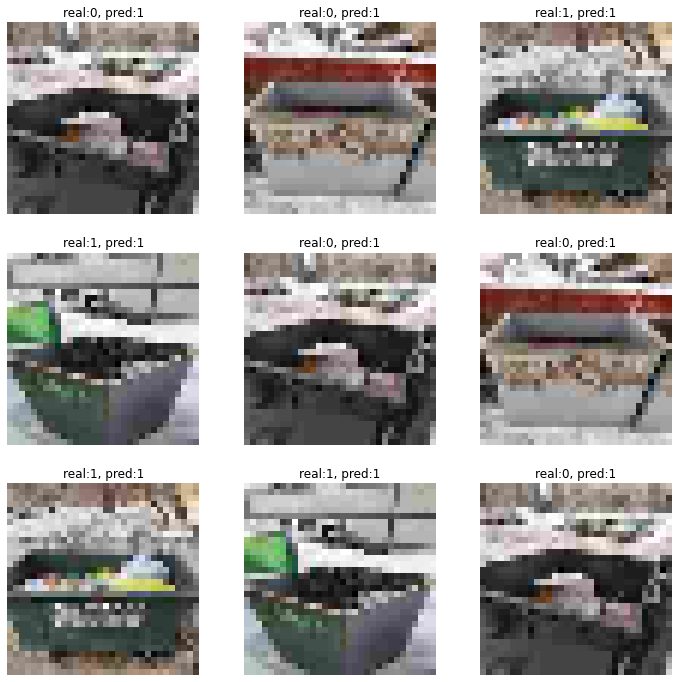

In [60]:
# Testing dataset preprocessing (normalization).
test_datagen = ImageDataGenerator(rescale=rescale)

test_dataset = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(32, 32),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    seed=42
)

predictions = model.predict(test_dataset)

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12,12))
for i in range(3):
  for j in range(3):
    image, label = test_dataset.next()
    axs[i,j].set_title(f'real:{np.argmax(label[0])}, pred:{np.argmax(predictions[32*(3*j+i) % 32])}')
    axs[i,j].imshow(image[0])
    axs[i,j].axis('off')
plt.show()
